In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

Gen Info LA CA table has 20 rows (hospitals) 
Inpatient LA CA table has 1020 rows
Physicians / suppliers LA CA table has 50,341 rows ... will not use for this project given its size and not necessary to answer business question
Outpatient LA CA table has 122 rows

In [540]:
gen_info = pd.read_csv('hospital_gen_info_LA_CA.csv')
inpatient = pd.read_csv('inpatient_LA_CA_2015.csv')
outpatient = pd.read_csv('outpatient_LA_CA_2015.csv')

In [541]:
gen_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            20 non-null     int64  
 1   hospital_name                                          20 non-null     object 
 2   address                                                20 non-null     object 
 3   city                                                   20 non-null     object 
 4   state                                                  20 non-null     object 
 5   zip_code                                               20 non-null     int64  
 6   county_name                                            20 non-null     object 
 7   phone_number                                           20 non-null     object 
 8   hospital_type                                       

In [542]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           1020 non-null   int64  
 1   provider_name                         1020 non-null   object 
 2   provider_street_address               1020 non-null   object 
 3   provider_city                         1020 non-null   object 
 4   provider_state                        1020 non-null   object 
 5   provider_zipcode                      1020 non-null   int64  
 6   drg_definition                        1020 non-null   object 
 7   hospital_referral_region_description  1020 non-null   object 
 8   total_discharges                      1020 non-null   int64  
 9   average_covered_charges               1020 non-null   float64
 10  average_total_payments                1020 non-null   float64
 11  average_medicare_

In [543]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          122 non-null    int64  
 1   provider_name                        122 non-null    object 
 2   provider_street_address              122 non-null    object 
 3   provider_city                        122 non-null    object 
 4   provider_state                       122 non-null    object 
 5   provider_zipcode                     122 non-null    int64  
 6   apc                                  122 non-null    object 
 7   hospital_referral_region             122 non-null    object 
 8   outpatient_services                  122 non-null    int64  
 9   average_estimated_submitted_charges  122 non-null    float64
 10  average_total_payments               122 non-null    float64
dtypes: float64(2), int64(3), object(

In [544]:
#gen_info.head()

In [545]:
gen_info.isnull().sum()
# results of above indicate that Footnotes have missing values, though not many compared to large number of non-missing; however, they are also not important for this analysis

provider_id                                               0
hospital_name                                             0
address                                                   0
city                                                      0
state                                                     0
zip_code                                                  0
county_name                                               0
phone_number                                              0
hospital_type                                             0
hospital_ownership                                        0
emergency_services                                        0
meets_criteria_for_promoting_interoperability_of_ehrs     6
hospital_overall_rating                                   0
hospital_overall_rating_footnote                         13
mortality_group_measure_count                             0
facility_mortaility_measures_count                        0
mortality_measures_better_count         

In [546]:
inpatient.isnull().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
drg_definition                          0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
dtype: int64

In [547]:
outpatient.isnull().sum()

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
hospital_referral_region               0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64

In [548]:
#inpatient.head()

In [549]:
#outpatient.head()

In [550]:
df_in_gen = inpatient.merge(gen_info,how='inner', on='provider_id')

In [551]:
df_in_gen.provider_name.unique()

array(['CALIFORNIA HOSPITAL MEDICAL CENTER LA', 'GOOD SAMARITAN HOSPITAL',
       'EAST LOS ANGELES DOCTORS HOSPITAL',
       'LOS ANGELES COMMUNITY HOSPITAL', 'SILVER LAKE MEDICAL CENTER',
       'HOLLYWOOD PRESBYTERIAN MEDICAL CENTER',
       'KAISER FOUNDATION HOSPITAL - LOS ANGELES',
       'WHITE MEMORIAL MEDICAL CENTER', 'LAC+USC MEDICAL CENTER',
       'KECK HOSPITAL OF USC', 'KAISER FOUNDATION HOSPITAL - WEST LA',
       'OLYMPIA MEDICAL CENTER', 'CEDARS-SINAI MEDICAL CENTER',
       'RONALD REAGAN U C L A MEDICAL CENTER'], dtype=object)

In [552]:
df_out_gen = outpatient.merge(gen_info,how='inner',on='provider_id')

In [553]:
df_out_gen.provider_name.unique()

array(['Hollywood Presbyterian Medical Center',
       'White Memorial Medical Center',
       'California Hospital Medical Center La',
       'Ronald Reagan U C L A Medical Center', 'Good Samaritan Hospital',
       'Cedars-Sinai Medical Center', 'East Los Angeles Doctors Hospital',
       'Los Angeles Community Hospital', 'Keck Hospital Of Usc',
       'Olympia Medical Center', 'Silver Lake Medical Center'],
      dtype=object)

In [554]:
# here we need to concatenate these because when it was run otherwise, the inpatient diagnoses and outpatient diagnoses 
# were arbitrarily combined on one row.
# With the concatenate, each row should be defined by the hospital name (provider ID) and diagnosis code 
vertical_concat = pd.concat([df_in_gen, df_out_gen], axis=0)

In [555]:
vertical_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 104
Data columns (total 53 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            1029 non-null   int64  
 1   provider_name                                          1029 non-null   object 
 2   provider_street_address                                1029 non-null   object 
 3   provider_city                                          1029 non-null   object 
 4   provider_state                                         1029 non-null   object 
 5   provider_zipcode                                       1029 non-null   int64  
 6   drg_definition                                         924 non-null    object 
 7   hospital_referral_region_description                   924 non-null    object 
 8   total_discharges                                 

Now reviewing variables in concated merged dataframe
See that not all columns appear necessary for analysis and some are duplicates (eg provider name and hospital name)
Also footnote columns not helpful and have many missing values
Will drop columns below

In [556]:
vertical1 = vertical_concat.drop([ 
               'provider_street_address', 
               'provider_city',
               'provider_state',
               'provider_zipcode', 
               'hospital_name',
                'city',
                'address',
                'state',
                'zip_code',
               'phone_number', 
               'county_name', 
               'hospital_referral_region_description',
               'hospital_overall_rating_footnote',
               'mortaility_group_footnote',
               'safety_group_footnote',
               'readmission_measures_footnote',
               'patient_experience_measures_footnote',
               'timely_and_effective_care_measures_footnote'], 
              axis = 1)

In [557]:
vertical1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 104
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            1029 non-null   int64  
 1   provider_name                                          1029 non-null   object 
 2   drg_definition                                         924 non-null    object 
 3   total_discharges                                       924 non-null    float64
 4   average_covered_charges                                924 non-null    float64
 5   average_total_payments                                 1029 non-null   float64
 6   average_medicare_payments                              924 non-null    float64
 7   hospital_type                                          1029 non-null   object 
 8   hospital_ownership                               

Now will inspect addiontal columns to see if they add value 

In [558]:
vertical1['hospital_type'].value_counts()
# Can therefore delete hospital type column

Acute Care Hospitals    1029
Name: hospital_type, dtype: int64

In [559]:
vertical1['hospital_ownership'].value_counts()
# will keep this

Voluntary non-profit - Other      462
Proprietary                       302
Government - State                175
Voluntary non-profit - Church      57
Government - Local                 29
Voluntary non-profit - Private      4
Name: hospital_ownership, dtype: int64

In [560]:
vertical1['emergency_services'].value_counts()
# will keep this

True     656
False    373
Name: emergency_services, dtype: int64

In [561]:
vertical1['meets_criteria_for_promoting_interoperability_of_ehrs'].value_counts()
# can therefore remove this row too

True    967
Name: meets_criteria_for_promoting_interoperability_of_ehrs, dtype: int64

In [562]:
vertical1['apc'].value_counts()

0269 - Level I Echocardiogram Without Contrast                                           11
0634 - Hospital Clinic Visits                                                            10
0267 - Level III Diagnostic and Screening Ultrasound                                     10
0377 - Level II Cardiac Imaging                                                           7
0265 - Level I Diagnostic and Screening Ultrasound                                        6
0369 - Level II Pulmonary Tests                                                           6
0207 - Level III Nerve Injections                                                         5
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast     5
0015 - Level II Debridement & Destruction                                                 5
0020 - Level II Excision/ Biopsy                                                          5
0690 - Level I Electronic Analysis of Devices                                   

In [623]:
vertical1['apc'].count()

105

In [563]:
vertical1['hospital_referral_region'].value_counts()

CA - Los Angeles    105
Name: hospital_referral_region, dtype: int64

In [564]:
# the number of services billed by provider
vertical1['outpatient_services'].value_counts()

11.0      4
12.0      4
22.0      3
29.0      3
70.0      2
         ..
1464.0    1
540.0     1
566.0     1
4616.0    1
510.0     1
Name: outpatient_services, Length: 88, dtype: int64

In [565]:
vertical2 = vertical1.drop(['hospital_ownership', 'meets_criteria_for_promoting_interoperability_of_ehrs', 
                            'hospital_referral_region' ], axis=1)
vertical2.dtypes

provider_id                                            int64
provider_name                                         object
drg_definition                                        object
total_discharges                                     float64
average_covered_charges                              float64
average_total_payments                               float64
average_medicare_payments                            float64
hospital_type                                         object
emergency_services                                      bool
hospital_overall_rating                               object
mortality_group_measure_count                         object
facility_mortaility_measures_count                    object
mortality_measures_better_count                       object
mortality_measures_no_different_count                 object
mortality_measures_worse_count                        object
safety_measures_count                                 object
facility_care_safety_mea

In [566]:
# Ran all of these independently one-by-one to see how many "Not Available" values there were for each since 
# could not convert string object to integer or float
# with the "Not Available" and also they would present problems later for analysis

#vertical2['hospital_overall_rating'].value_counts()
#vertical2['mortality_group_measure_count'].value_counts()
#vertical2['facility_mortaility_measures_count'].value_counts()
#vertical2['mortality_measures_better_count'].value_counts()
#vertical2['mortality_measures_no_different_count'].value_counts()
#vertical2['mortality_measures_worse_count'].value_counts()
#vertical2['safety_measures_count'].value_counts()
#vertical2['facility_care_safety_measures_count'].value_counts()
#vertical2['safety_measures_better_count'].value_counts()
#vertical2['safety_measures_no_different_count'].value_counts()
#vertical2['safety_measures_worse_count'].value_counts()
#vertical2['readmission_measures_count'].value_counts()
#vertical2['facility_readmission_measures_count'].value_counts()
#vertical2['readmission_measures_better_count'].value_counts()
#vertical2['readmission_measures_no_different_count'].value_counts()
#vertical2['readmission_measures_worse_count'].value_counts()
#vertical2['patient_experience_measures_count'].value_counts()
#vertical2['facility_patient_experience_measures_count'].value_counts()
#vertical2['timely_and_effective_care_measures_count'].value_counts()
vertical2['facility_timely_and_effective_care_measures_count'].value_counts()



12    487
7     231
9     212
8      60
2      29
3      10
Name: facility_timely_and_effective_care_measures_count, dtype: int64

In [567]:
# From above evaluation found that the following columns have no variation - 
# all values are same or same plus some 'Not available'
# Importantly this is because these count variables are defined in the Medicare data dictionary as the total number 
# of possible measures in that particular group 
# group = for instance, mortality or safety group



vertical3 = vertical2.drop([ 'mortality_group_measure_count','safety_measures_count', 'readmission_measures_count',
                            'patient_experience_measures_count', 'facility_patient_experience_measures_count', 
                           'timely_and_effective_care_measures_count'
                           ], axis=1)



In [568]:
vertical3.provider_name.isnull().sum()

0

In [569]:
#vertical2[vertical2['provider_id'] == 50561]

In [570]:
vertical3 [vertical3.facility_mortaility_measures_count == 'Not Available'].T

,419,420,421,422
provider_id,50561,50561,50561,50561
provider_name,KAISER FOUNDATION HOSPITAL - WEST LA,KAISER FOUNDATION HOSPITAL - WEST LA,KAISER FOUNDATION HOSPITAL - WEST LA,KAISER FOUNDATION HOSPITAL - WEST LA
drg_definition,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...
total_discharges,11.0,15.0,59.0,31.0
average_covered_charges,49282.0,28143.0,40972.0,24978.0
average_total_payments,11305.0,7987.0,12758.0,9020.0
average_medicare_payments,10301.0,5756.0,9789.0,5241.0
hospital_type,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals
emergency_services,False,False,False,False
hospital_overall_rating,1,1,1,1


In [571]:
# see above that 8 observations (rows) have four columns with missing values for the mortality measures- not a big 
# percent of toal observations so will drop these few rather than trying to come up with imputation of values
vertical3 = vertical3[vertical3.facility_mortaility_measures_count != 'Not Available']

In [572]:
vertical3 [vertical3.facility_mortaility_measures_count == 'Not Available'].T

""
provider_id
provider_name
drg_definition
total_discharges
average_covered_charges
average_total_payments
average_medicare_payments
hospital_type
emergency_services
hospital_overall_rating


Thought about doing this - but it did not seem as helpful as below
import numpy as np
vertical2.replace('Not Available',np.NaN)
So below will convert all the measure counts from objects into integers so to be able analyze changes in relation to outcomes later

In [573]:
vertical3['hospital_overall_rating'] = vertical3['hospital_overall_rating'].astype(int)
vertical3['facility_mortality_measures_count'] = vertical3['facility_mortaility_measures_count'].astype(int)
vertical3['mortality_measures_better_count'] = vertical3['mortality_measures_better_count'].astype(int)
vertical3['mortality_measures_no_different_count'] = vertical3['mortality_measures_no_different_count'].astype(int)
vertical3['mortality_measures_worse_count'] = vertical3['mortality_measures_worse_count'].astype(int)
vertical3['facility_care_safety_measures_count'] = vertical3['facility_care_safety_measures_count'].astype(int)
vertical3['safety_measures_better_count'] = vertical3['safety_measures_better_count'].astype(int)
vertical3['safety_measures_no_different_count'] = vertical3['safety_measures_no_different_count'].astype(int)
vertical3['safety_measures_worse_count'] = vertical3['safety_measures_worse_count'].astype(int)
vertical3['facility_readmission_measures_count'] = vertical3['facility_readmission_measures_count'].astype(int)
vertical3['readmission_measures_better_count'] = vertical3['readmission_measures_better_count'].astype(int)
vertical3['readmission_measures_no_different_count'] = vertical3['readmission_measures_no_different_count'].astype(int)
vertical3['readmission_measures_worse_count'] = vertical3['readmission_measures_worse_count'].astype(int)
vertical3['facility_timely_and_effective_care_measures_count'] = vertical3['facility_timely_and_effective_care_measures_count'].astype(int)

vertical3.dtypes

provider_id                                            int64
provider_name                                         object
drg_definition                                        object
total_discharges                                     float64
average_covered_charges                              float64
average_total_payments                               float64
average_medicare_payments                            float64
hospital_type                                         object
emergency_services                                      bool
hospital_overall_rating                                int32
facility_mortaility_measures_count                    object
mortality_measures_better_count                        int32
mortality_measures_no_different_count                  int32
mortality_measures_worse_count                         int32
facility_care_safety_measures_count                    int32
safety_measures_better_count                           int32
safety_measures_no_diffe

In [574]:
vertical3.provider_name.isnull().sum()

0

In [575]:
# Note that original dataset with gen info had 20 hospitals
# there are now 13 in the dataframe
# 8 were dropped in the merges of gen info with inpatient and outpatient data(see above)
# 1 was picked up : Silver Lake hospital 
vertical3.provider_name.value_counts()

CEDARS-SINAI MEDICAL CENTER                 293
RONALD REAGAN U C L A MEDICAL CENTER        153
KECK HOSPITAL OF USC                         95
GOOD SAMARITAN HOSPITAL                      73
HOLLYWOOD PRESBYTERIAN MEDICAL CENTER        66
OLYMPIA MEDICAL CENTER                       55
WHITE MEMORIAL MEDICAL CENTER                48
LOS ANGELES COMMUNITY HOSPITAL               35
LAC+USC MEDICAL CENTER                       29
SILVER LAKE MEDICAL CENTER                   27
CALIFORNIA HOSPITAL MEDICAL CENTER LA        25
Ronald Reagan U C L A Medical Center         22
Cedars-Sinai Medical Center                  19
Keck Hospital Of Usc                         18
EAST LOS ANGELES DOCTORS HOSPITAL            15
Good Samaritan Hospital                      11
White Memorial Medical Center                 9
Olympia Medical Center                        7
KAISER FOUNDATION HOSPITAL - LOS ANGELES      6
California Hospital Medical Center La         6
Hollywood Presbyterian Medical Center   

In [576]:
vertical3.provider_id.value_counts()

50625    312
50262    175
50696    113
50471     84
50063     71
50742     62
50103     57
50663     38
50149     31
50763     29
50373     29
50641     18
50138      6
Name: provider_id, dtype: int64

In [577]:
# need to address above 13 provider IDs but 24 hospital names!

In [578]:
vertical3.provider_name.isnull().sum()

0

In [579]:
vertical4 = vertical3
vertical3.provider_name.value_counts()

CEDARS-SINAI MEDICAL CENTER                 293
RONALD REAGAN U C L A MEDICAL CENTER        153
KECK HOSPITAL OF USC                         95
GOOD SAMARITAN HOSPITAL                      73
HOLLYWOOD PRESBYTERIAN MEDICAL CENTER        66
OLYMPIA MEDICAL CENTER                       55
WHITE MEMORIAL MEDICAL CENTER                48
LOS ANGELES COMMUNITY HOSPITAL               35
LAC+USC MEDICAL CENTER                       29
SILVER LAKE MEDICAL CENTER                   27
CALIFORNIA HOSPITAL MEDICAL CENTER LA        25
Ronald Reagan U C L A Medical Center         22
Cedars-Sinai Medical Center                  19
Keck Hospital Of Usc                         18
EAST LOS ANGELES DOCTORS HOSPITAL            15
Good Samaritan Hospital                      11
White Memorial Medical Center                 9
Olympia Medical Center                        7
KAISER FOUNDATION HOSPITAL - LOS ANGELES      6
California Hospital Medical Center La         6
Hollywood Presbyterian Medical Center   

In [580]:
vertical4['provider_name'] = vertical4['provider_name'].map({'Silver Lake Medical Center': 'SILVER LAKE MEDICAL CENTER', 
     'Los Angeles Community Hospital': 'LOS ANGELES COMMUNITY HOSPITAL',
     'Ronald Reagan U C L A Medical Center' : 'RONALD REAGAN U C L A MEDICAL CENTER',
     'Cedars-Sinai Medical Center': 'CEDARS-SINAI MEDICAL CENTER', 
     'Keck Hospital Of Usc'  : 'KECK HOSPITAL OF USC',
     'Good Samaritan Hospital': 'GOOD SAMARITAN HOSPITAL',
     'White Memorial Medical Center': 'WHITE MEMORIAL MEDICAL CENTER',
     'Olympia Medical Center' : 'OLYMPIA MEDICAL CENTER',
     'California Hospital Medical Center La': 'CALIFORNIA HOSPITAL MEDICAL CENTER LA',
     'Hollywood Presbyterian Medical Center' : 'HOLLYWOOD PRESBYTERIAN MEDICAL CENTER',
     'East Los Angeles Doctors Hospital': 'EAST LOS ANGELES DOCTORS HOSPITAL', 
    'KAISER FOUNDATION HOSPITAL - LOS ANGELES': 'KAISER FOUNDATION HOSPITAL - LOS ANGELES',
      'LAC+USC MEDICAL CENTER': 'LAC+USC MEDICAL CENTER', 
    'RONALD REAGAN U C L A MEDICAL CENTER' : 'RONALD REAGAN U C L A MEDICAL CENTER',
    'CEDARS-SINAI MEDICAL CENTER': 'CEDARS-SINAI MEDICAL CENTER',
    'KECK HOSPITAL OF USC': 'KECK HOSPITAL OF USC', 
    'WHITE MEMORIAL MEDICAL CENTER':'WHITE MEMORIAL MEDICAL CENTER',
    'GOOD SAMARITAN HOSPITAL': 'GOOD SAMARITAN HOSPITAL',
    'WHITE MEMORIAL MEDICAL CENTER':'WHITE MEMORIAL MEDICAL CENTER',
     'OLYMPIA MEDICAL CENTER':'OLYMPIA MEDICAL CENTER',
      'CALIFORNIA HOSPITAL MEDICAL CENTER LA': 'CALIFORNIA HOSPITAL MEDICAL CENTER LA',
      'HOLLYWOOD PRESBYTERIAN MEDICAL CENTER':'HOLLYWOOD PRESBYTERIAN MEDICAL CENTER',                                                       
      'EAST LOS ANGELES DOCTORS HOSPITAL':'EAST LOS ANGELES DOCTORS HOSPITAL',                                                       
        'LOS ANGELES COMMUNITY HOSPITAL' : 'LOS ANGELES COMMUNITY HOSPITAL',                                                    
         'SILVER LAKE MEDICAL CENTER': 'SILVER LAKE MEDICAL CENTER' })
vertical4.provider_name.value_counts()

CEDARS-SINAI MEDICAL CENTER                 312
RONALD REAGAN U C L A MEDICAL CENTER        175
KECK HOSPITAL OF USC                        113
GOOD SAMARITAN HOSPITAL                      84
HOLLYWOOD PRESBYTERIAN MEDICAL CENTER        71
OLYMPIA MEDICAL CENTER                       62
WHITE MEMORIAL MEDICAL CENTER                57
LOS ANGELES COMMUNITY HOSPITAL               38
CALIFORNIA HOSPITAL MEDICAL CENTER LA        31
SILVER LAKE MEDICAL CENTER                   29
LAC+USC MEDICAL CENTER                       29
EAST LOS ANGELES DOCTORS HOSPITAL            18
KAISER FOUNDATION HOSPITAL - LOS ANGELES      6
Name: provider_name, dtype: int64

In [581]:
vertical4.provider_name.isnull().sum()

0

In [482]:
vertical4.provider_id.unique()

array([50149, 50471, 50641, 50663, 50763, 50063, 50138, 50103, 50373,
       50696, 50742, 50625, 50262], dtype=int64)

In [483]:
vertical4.groupby("provider_name")["provider_id"].unique()
#  important note : 2 provider IDs are not mapping 50138 and 50373

provider_name
CALIFORNIA HOSPITAL MEDICAL CENTER LA       [50149]
CEDARS-SINAI MEDICAL CENTER                 [50625]
EAST LOS ANGELES DOCTORS HOSPITAL           [50641]
GOOD SAMARITAN HOSPITAL                     [50471]
HOLLYWOOD PRESBYTERIAN MEDICAL CENTER       [50063]
KAISER FOUNDATION HOSPITAL - LOS ANGELES    [50138]
KECK HOSPITAL OF USC                        [50696]
LAC+USC MEDICAL CENTER                      [50373]
LOS ANGELES COMMUNITY HOSPITAL              [50663]
OLYMPIA MEDICAL CENTER                      [50742]
RONALD REAGAN U C L A MEDICAL CENTER        [50262]
SILVER LAKE MEDICAL CENTER                  [50763]
WHITE MEMORIAL MEDICAL CENTER               [50103]
Name: provider_id, dtype: object

In [491]:
# important to note that some of the the rows / observations have missing values for inpatient charges/reimbursement and some have
# missing values for outpatient values
vertical4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 104
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   provider_id                                        1025 non-null   int64  
 1   provider_name                                      140 non-null    object 
 2   drg_definition                                     920 non-null    object 
 3   total_discharges                                   920 non-null    float64
 4   average_covered_charges                            920 non-null    float64
 5   average_total_payments                             1025 non-null   float64
 6   average_medicare_payments                          920 non-null    float64
 7   hospital_type                                      1025 non-null   object 
 8   emergency_services                                 1025 non-null   bool   
 9   hospital_

In [489]:
vertical4[vertical4['provider_name'] == 'SILVER LAKE MEDICAL CENTER' ].head().T
# Important note - appears that Silver Lake Medical Center and Downtown LA Medical Center both have same provider ID 50763
# LA Downtown Medical Center was formerly known as Silver Lake Medical Center 
# Note that LA Downtown Medical Center is no longer in dataset - it did not have inpatient/outpatient services and charges under that name
# (https://www.ahd.com/free_profile/050763/Silver_Lake_Medical_Center_-_Downtown/Los_Angeles/California/)

,103,104
provider_id,50763,50763
provider_name,SILVER LAKE MEDICAL CENTER,SILVER LAKE MEDICAL CENTER
drg_definition,NaN,NaN
total_discharges,NaN,NaN
average_covered_charges,NaN,NaN
average_total_payments,516.036957,111.503431
average_medicare_payments,NaN,NaN
hospital_type,Acute Care Hospitals,Acute Care Hospitals
emergency_services,False,False
hospital_overall_rating,5,5


In [485]:
vertical4.drg_definition.unique()

array(['064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC OR TPA IN 24 HRS',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '069 - TRANSIENT ISCHEMIA',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '208 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS',
       '252 - OTHER VASCULAR PROCEDURES W MCC',
       '291 - HEART FAILURE & SHOCK W MCC',
       '292 - HEART FAILURE & SHOCK W CC',
       '300 - PERIPHERAL VASCULAR DISORDERS W CC',
       '312 - SYNCOPE & COLLAPSE', '313 - CHEST PAIN',
       '314 - OTHER CIRCULATORY SYSTEM DIAGNOSES W MCC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
       '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',
       '602 - CELLULITIS W MCC', '603 - CELLULITIS W/O MCC',
       '638 - DIABETES W CC',
    

In [612]:
vertical4[['total_discharges','average_covered_charges','average_total_payments','average_medicare_payments', 'outpatient_services', 'average_estimated_submitted_charges' ]].describe().T
# take away is that none of the distributions below appear normally distributed

# note 920 inpatient charges and 105 outpatient charges in data set

,count,mean,std,min,25%,50%,75%,max
total_discharges,920.0,39.347826,81.589452,11.000000,15.000000,22.000000,38.000000,1.706000e+03
average_covered_charges,920.0,137257.729348,180052.466185,11394.000000,48878.750000,85908.500000,155742.500000,2.361257e+06
average_total_payments,1025.0,23522.308535,31933.980742,38.041231,9862.000000,15109.000000,26161.000000,4.494860e+05
average_medicare_payments,920.0,22505.996739,28998.908974,3379.000000,9244.250000,14034.000000,23784.000000,4.044090e+05
outpatient_services,105.0,2416.076190,11170.460014,11.000000,42.000000,154.000000,566.000000,6.917900e+04
average_estimated_submitted_charges,105.0,4003.301012,5614.274795,166.903964,746.702727,2044.378838,4969.077206,3.857656e+04


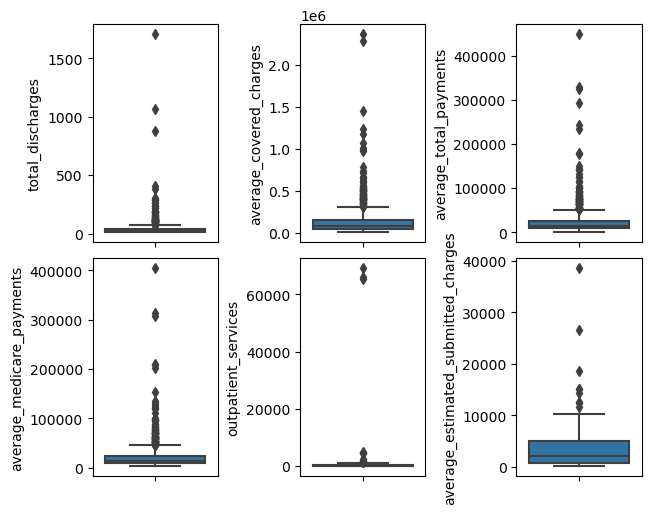

In [618]:
fig, axes = plt.subplots(2, 3, constrained_layout = True)
sns.boxplot(  y=vertical4["total_discharges"], ax=axes[0,0]) 
sns.boxplot(  y=vertical4["average_covered_charges"], ax=axes[0,1]) 
sns.boxplot(  y=vertical4["average_total_payments"], ax=axes[0,2]) 
sns.boxplot(  y=vertical4["average_medicare_payments"], ax=axes[1,0]) 
sns.boxplot(  y=vertical4["outpatient_services"], ax=axes[1,1]) 
sns.boxplot(  y=vertical4["average_estimated_submitted_charges"], ax=axes[1,2]) 
plt.show()

In [38]:
# Generally, do not see a reason to remove any of the outliers right now - there may be some extremely expensive 
# medical cases in terms of charges and payments

In [584]:
vertical4[vertical4['total_discharges'] >= 500].T

,173,654,752
provider_id,50763,50625,50625
provider_name,SILVER LAKE MEDICAL CENTER,CEDARS-SINAI MEDICAL CENTER,CEDARS-SINAI MEDICAL CENTER
drg_definition,885 - PSYCHOSES,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...
total_discharges,1706.0,875.0,1068.0
average_covered_charges,32980.0,142348.0,166941.0
average_total_payments,12238.0,19041.0,20655.0
average_medicare_payments,11306.0,15673.0,17424.0
hospital_type,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals
emergency_services,False,True,True
hospital_overall_rating,5,5,5


In [585]:
vertical4[vertical4['average_covered_charges'] >= 1000000].T
# note that transplants are some of the most expensive admissions

,324,326,478,479,480,481,771
provider_id,50696,50696,50625,50625,50625,50625,50262
provider_name,KECK HOSPITAL OF USC,KECK HOSPITAL OF USC,CEDARS-SINAI MEDICAL CENTER,CEDARS-SINAI MEDICAL CENTER,CEDARS-SINAI MEDICAL CENTER,CEDARS-SINAI MEDICAL CENTER,RONALD REAGAN U C L A MEDICAL CENTER
drg_definition,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",007 - LUNG TRANSPLANT,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...
total_discharges,51.0,26.0,44.0,64.0,21.0,14.0,19.0
average_covered_charges,1239440.0,1075686.0,2361257.0,2282769.0,1017373.0,1182540.0,1450591.0
average_total_payments,233444.0,178531.0,326124.0,329880.0,142645.0,125308.0,449486.0
average_medicare_payments,202079.0,153603.0,313246.0,307419.0,134701.0,119758.0,404409.0
hospital_type,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals
emergency_services,False,False,True,True,True,True,True
hospital_overall_rating,4,4,5,5,5,5,4


In [586]:
vertical4.shape

(1025, 27)

In [587]:
duplicate_rows = vertical4[vertical4.duplicated(keep=False)]
duplicate_rows.sort_values(by=['provider_id',
                               'total_discharges','average_covered_charges','average_medicare_payments'])

# No duplicates!

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,safety_measures_worse_count,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count


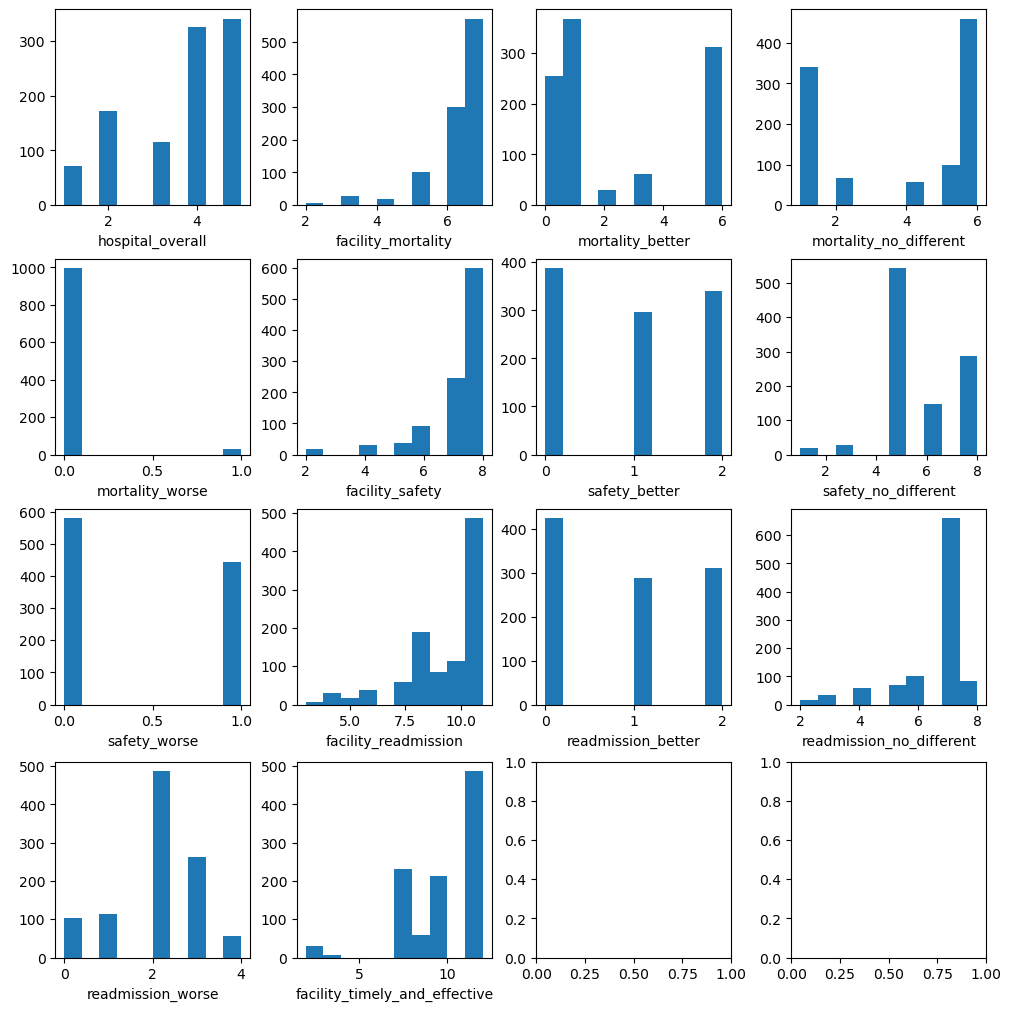

In [588]:
fig, ax = plt.subplots(4,4, figsize=(10,10), constrained_layout = True)
ax[0,0].hist(vertical3['hospital_overall_rating'])
ax[0,0].set_xlabel('hospital_overall')
ax[0,1].hist(vertical3['facility_mortality_measures_count'])
ax[0,1].set_xlabel('facility_mortality')
ax[0,2].hist(vertical3['mortality_measures_better_count'])
ax[0,2].set_xlabel('mortality_better')
ax[0,3].hist(vertical3['mortality_measures_no_different_count'])
ax[0,3].set_xlabel('mortality_no_different')

ax[1,0].hist(vertical3['mortality_measures_worse_count'])
ax[1,0].set_xlabel('mortality_worse')
ax[1,1].hist(vertical3['facility_care_safety_measures_count'])
ax[1,1].set_xlabel('facility_safety')
ax[1,2].hist(vertical3['safety_measures_better_count'])
ax[1,2].set_xlabel('safety_better')
ax[1,3].hist(vertical3['safety_measures_no_different_count'])
ax[1,3].set_xlabel('safety_no_different')

ax[2,0].hist(vertical3['safety_measures_worse_count'])
ax[2,0].set_xlabel('safety_worse')
ax[2,1].hist(vertical3['facility_readmission_measures_count'])
ax[2,1].set_xlabel('facility_readmission')
ax[2,2].hist(vertical3['readmission_measures_better_count'] )
ax[2,2].set_xlabel('readmission_better')
ax[2,3].hist(vertical3['readmission_measures_no_different_count'])
ax[2,3].set_xlabel('readmission_no_different')

ax[3,0].hist(vertical3['readmission_measures_worse_count'])
ax[3,0].set_xlabel('readmission_worse')
ax[3,1].hist(vertical3['facility_timely_and_effective_care_measures_count'])
ax[3,1].set_xlabel('facility_timely_and_effective')

plt.show()

In [608]:
# need to check that total number of measures alloted does not exceed total number permitted
vertical4['mortality_sum'] = vertical4['mortality_measures_better_count'] + vertical4['mortality_measures_no_different_count'] + vertical4['mortality_measures_worse_count']
#print(vertical4.mortality_sum)
#print(vertical4.mortality_measures_better_count)
vertical4[vertical4['facility_mortality_measures_count'] < vertical4['mortality_sum']]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count,mortality_sum


In [609]:
vertical4['safety_sum'] = vertical4['safety_measures_better_count'] + vertical4['safety_measures_no_different_count'] + vertical4['safety_measures_worse_count']
#print(vertical4.mortality_sum)
#print(vertical4.mortality_measures_better_count)
vertical4[vertical4['facility_care_safety_measures_count'] < vertical4 ['safety_sum']]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count,mortality_sum,safety_sum


In [611]:
vertical4['readmission_sum'] = vertical4['readmission_measures_better_count'] + vertical4['readmission_measures_no_different_count'] + vertical4['readmission_measures_worse_count']
#print(vertical4.mortality_sum)
#print(vertical4.mortality_measures_better_count)
vertical4[vertical4['facility_readmission_measures_count'] < vertical4 ['readmission_sum']]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count,mortality_sum,safety_sum,readmission_sum


In [ ]:
# Mpte that explanatory variable of interest will likely be 
# vertical4['mortality_measures_no_different_count'] + vertical4['mortality_measures_worse_count']
# vertical4['safety_measures_no_different_count'] + vertical4['safety_measures_worse_count']
# vertical4['readmission_measures_no_different_count'] + vertical4['readmission_measures_worse_count']
# as these are 6 areas where hospitals can change / improve their rankings
# and the analysis can see how this change may be related to higher reimbursement / payments, both outpatient and inpatient

Checking below that the max number of measures a hospital can have is not larger than maximum possible
Found the maximum possible from work above where some Count measures were all one value

In [589]:
vertical3[vertical3 ['facility_mortality_measures_count'] > 7 ]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,safety_measures_worse_count,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count


In [590]:
vertical3[vertical3['facility_care_safety_measures_count'] > 8 ]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,safety_measures_worse_count,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count


In [591]:
vertical3[vertical3['facility_readmission_measures_count'] > 11]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,safety_measures_worse_count,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count


In [592]:
vertical3[ vertical3['facility_timely_and_effective_care_measures_count'] > 14]

,provider_id,provider_name,drg_definition,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_type,emergency_services,hospital_overall_rating,...,safety_measures_worse_count,facility_readmission_measures_count,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,facility_timely_and_effective_care_measures_count,apc,outpatient_services,average_estimated_submitted_charges,facility_mortality_measures_count


In [621]:
vertical4.shape

(1025, 30)

In [622]:
# save the data to a new csv file
vertical4.to_csv("medicare_data_cleaned.csv", index=False)

Summary: End of data wrangling

Data has been acquired, organized, and cleaned. We have data from 20 unique hospitals in Los Angeles California area. We have data on outpatient charges and reimbursement and inpatient charges and reimbursement. We also have data on hospital characteristics. There are no duplicate obsevations or fields/columns. There are some outliers, which may be expected, and these have not been removed. There were missing values for some of the footnotes which were dropped as they did not appear valuable for the analysis and there were missing values for mortality measures 8 observations and these observations were dropped too as they constituted a small percentage of the overall dataset which now has 1025 observations. 

At this point, the proposal is to look at changes in mortality, safety, and readmissions measures - specifically
the "no different than" and "worse than" of each ot these 3 categories - and to relate them to the target variable, the "average total payments." This way we can explore how improving one more more of the 3 hospital characteristics may be associated with greater hospital revenue, understanding that there are other ways to increase revenue (including modifications in types of cases seen and procedures performed) but these may be outside the scope of this analysis. From this analysis, we may be able to predicte changes in revenue associated with improvements in mortality, safety, and readmission rates.